In [23]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [24]:
path_src = '../data/train.txt.src'
path_tgt = '../data/train.txt.tgt'

In [39]:
# Función para cargar datos
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        return f.read().splitlines()

# Cargar ambos datasets
src_data = load_data(path_src)
tgt_data = load_data(path_tgt)

print(f"Número de ejemplos (source): {len(src_data)}")
print(f"Número de ejemplos (target): {len(tgt_data)}")
print(f"\nPrimeros 3 ejemplos:")
print("\nSOURCE (artículo):")
for i in range(min(2, len(src_data))):
    print(f"\n{i+1}. {src_data[i]}")
print("\n\nTARGET (resumen):")
for i in range(min(2, len(tgt_data))):
    print(f"\n{i+1}. {tgt_data[i]}")

Número de ejemplos (source): 266367
Número de ejemplos (target): 266367

Primeros 3 ejemplos:

SOURCE (artículo):

1. De momento , no podemos responder a la pregunta frivolona que toda España se hace hoy , además de por qué bebí tanto anoche . ¿Qué cadena ganó en la retransmisión de las campanadas ? Los sentimos , Sofres no ofrece hoy los datos por ser festivo . Los contendientes fueron el colegueo de Los Manolos , Manu Carreño y Manolo Lama ( Cuatro ) , la gracia y juventud de los actores Antonio Garrido y Patricia Montero ( Antena 3 ) , el morboso dúo Sálvame , Javier Vázquez y Belén Esteban ( Telecinco ) , el valor seguro de Anne Igartiburu en TVE-1 y el humor inteligente de Berto y Ana Morgade ( La Sexta ) . Por primera vez en 13 años , Ramón García , el entrañable Ramontxu que aguantaba el frío como nadie bajo su capa , no estaba ante las cámaras . El menú para las últimas que los españoles vieron en el sistema analógico -el próximo 3 de abril todas las emisiones pasan a la TDT- ,

In [26]:
# ============================================
# ANÁLISIS DE LONGITUDES
# ============================================

src_lengths = [len(text.split()) for text in src_data]
tgt_lengths = [len(text.split()) for text in tgt_data]

print("=" * 50)
print("ESTADÍSTICAS DE LONGITUD (en palabras)")
print("=" * 50)
print("\nSOURCE (Artículos):")
print(f"  Media: {np.mean(src_lengths):.2f}")
print(f"  Mediana: {np.median(src_lengths):.2f}")
print(f"  Desv. Estándar: {np.std(src_lengths):.2f}")
print(f"  Mínimo: {min(src_lengths)}")
print(f"  Máximo: {max(src_lengths)}")
print(f"  Percentil 90: {np.percentile(src_lengths, 90):.2f}")
print(f"  Percentil 95: {np.percentile(src_lengths, 95):.2f}")
print(f"  Percentil 99: {np.percentile(src_lengths, 99):.2f}")

print("\nTARGET (Resúmenes):")
print(f"  Media: {np.mean(tgt_lengths):.2f}")
print(f"  Mediana: {np.median(tgt_lengths):.2f}")
print(f"  Desv. Estándar: {np.std(tgt_lengths):.2f}")
print(f"  Mínimo: {min(tgt_lengths)}")
print(f"  Máximo: {max(tgt_lengths)}")
print(f"  Percentil 90: {np.percentile(tgt_lengths, 90):.2f}")
print(f"  Percentil 95: {np.percentile(tgt_lengths, 95):.2f}")
print(f"  Percentil 99: {np.percentile(tgt_lengths, 99):.2f}")

print(f"\nRatio de compresión promedio: {np.mean(src_lengths) / np.mean(tgt_lengths):.2f}x")

ESTADÍSTICAS DE LONGITUD (en palabras)

SOURCE (Artículos):
  Media: 793.90
  Mediana: 697.00
  Desv. Estándar: 535.15
  Mínimo: 52
  Máximo: 14313
  Percentil 90: 1330.00
  Percentil 95: 1604.00
  Percentil 99: 2740.00

TARGET (Resúmenes):
  Media: 20.48
  Mediana: 20.00
  Desv. Estándar: 7.27
  Mínimo: 10
  Máximo: 256
  Percentil 90: 29.00
  Percentil 95: 33.00
  Percentil 99: 42.00

Ratio de compresión promedio: 38.76x


/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_71924/3666507646.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([src_lengths], vert=False, labels=['Source'])
/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_71924/3666507646.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([tgt_lengths], vert=False, labels=['Target'])


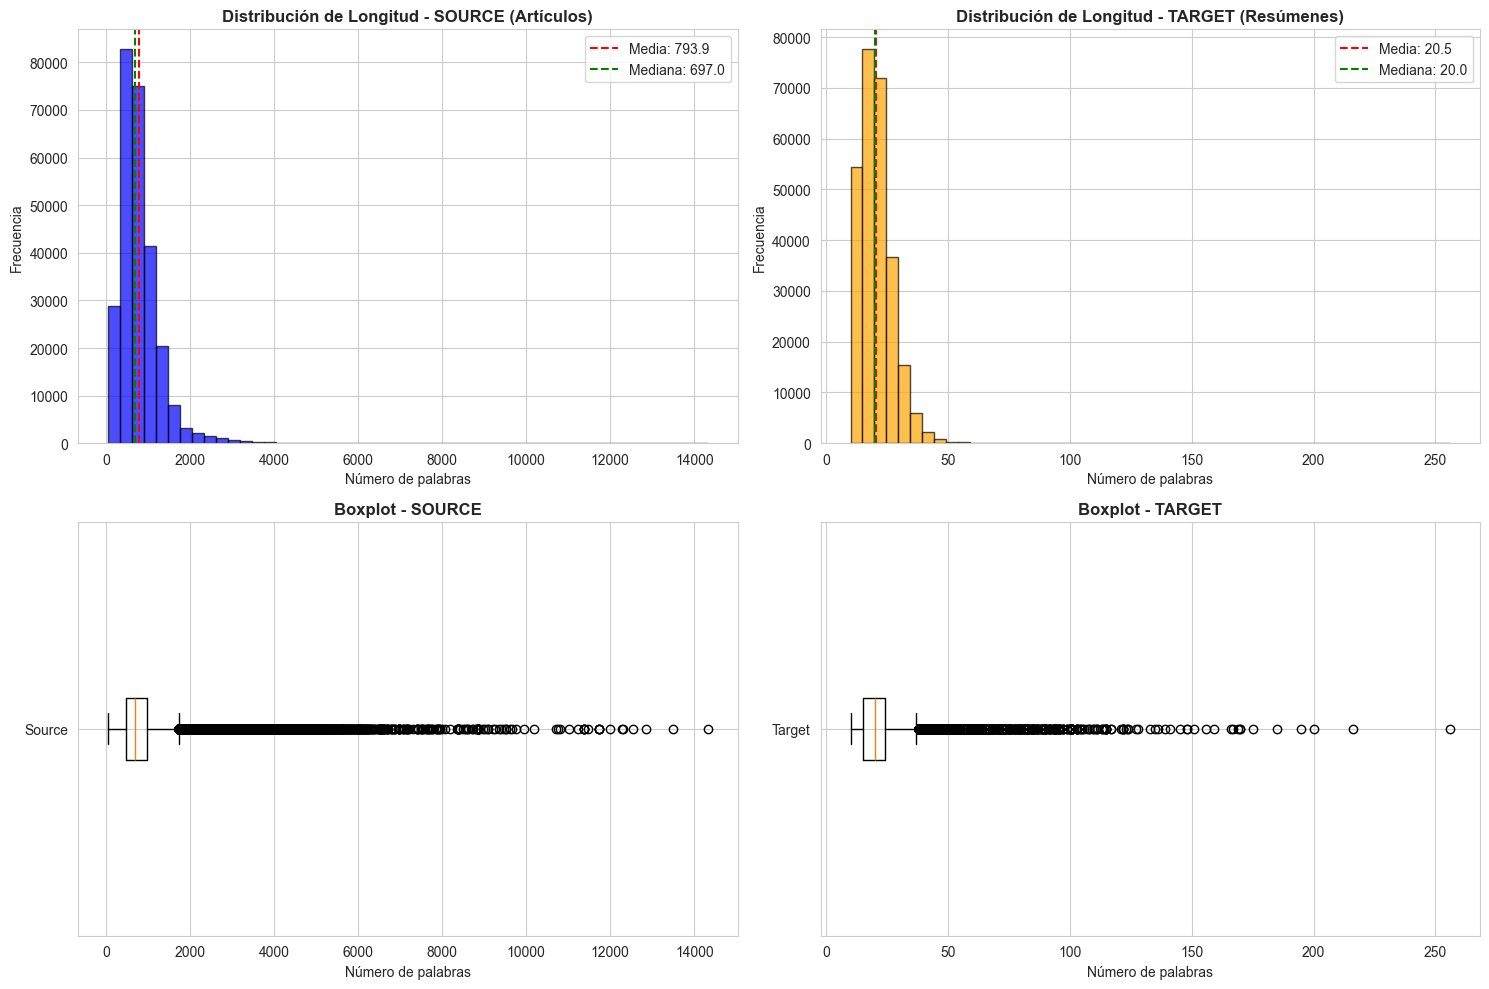

In [27]:
# Visualización de distribución de longitudes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogramas
axes[0, 0].hist(src_lengths, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0, 0].set_title('Distribución de Longitud - SOURCE (Artículos)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Número de palabras')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(np.mean(src_lengths), color='red', linestyle='--', label=f'Media: {np.mean(src_lengths):.1f}')
axes[0, 0].axvline(np.median(src_lengths), color='green', linestyle='--', label=f'Mediana: {np.median(src_lengths):.1f}')
axes[0, 0].legend()

axes[0, 1].hist(tgt_lengths, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Distribución de Longitud - TARGET (Resúmenes)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Número de palabras')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(np.mean(tgt_lengths), color='red', linestyle='--', label=f'Media: {np.mean(tgt_lengths):.1f}')
axes[0, 1].axvline(np.median(tgt_lengths), color='green', linestyle='--', label=f'Mediana: {np.median(tgt_lengths):.1f}')
axes[0, 1].legend()

# Boxplots
axes[1, 0].boxplot([src_lengths], vert=False, labels=['Source'])
axes[1, 0].set_title('Boxplot - SOURCE', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Número de palabras')

axes[1, 1].boxplot([tgt_lengths], vert=False, labels=['Target'])
axes[1, 1].set_title('Boxplot - TARGET', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Número de palabras')

plt.tight_layout()
plt.show()

In [28]:
# ============================================
# ANÁLISIS DE VOCABULARIO
# ============================================

# Análisis para SOURCE
src_words = Counter()
src_total_tokens = 0
for line in src_data:
    words = line.split()
    src_words.update(words)
    src_total_tokens += len(words)

# Análisis para TARGET
tgt_words = Counter()
tgt_total_tokens = 0
for line in tgt_data:
    words = line.split()
    tgt_words.update(words)
    tgt_total_tokens += len(words)

print("=" * 50)
print("ESTADÍSTICAS DE VOCABULARIO")
print("=" * 50)
print("\nSOURCE (Artículos):")
print(f"  Vocabulario único: {len(src_words):,}")
print(f"  Total de tokens: {src_total_tokens:,}")
print(f"  Type-Token Ratio: {len(src_words)/src_total_tokens:.4f}")
print(f"  Tokens por tipo (promedio): {src_total_tokens/len(src_words):.2f}")

print("\nTARGET (Resúmenes):")
print(f"  Vocabulario único: {len(tgt_words):,}")
print(f"  Total de tokens: {tgt_total_tokens:,}")
print(f"  Type-Token Ratio: {len(tgt_words)/tgt_total_tokens:.4f}")
print(f"  Tokens por tipo (promedio): {tgt_total_tokens/len(tgt_words):.2f}")

# Vocabulario compartido
shared_vocab = set(src_words.keys()) & set(tgt_words.keys())
print(f"\nVocabulario compartido: {len(shared_vocab):,}")
print(f"% de vocab TARGET en SOURCE: {len(shared_vocab)/len(tgt_words)*100:.2f}%")
print(f"% de vocab SOURCE en TARGET: {len(shared_vocab)/len(src_words)*100:.2f}%")

ESTADÍSTICAS DE VOCABULARIO

SOURCE (Artículos):
  Vocabulario único: 1,136,282
  Total de tokens: 211,469,292
  Type-Token Ratio: 0.0054
  Tokens por tipo (promedio): 186.11

TARGET (Resúmenes):
  Vocabulario único: 161,962
  Total de tokens: 5,455,890
  Type-Token Ratio: 0.0297
  Tokens por tipo (promedio): 33.69

Vocabulario compartido: 152,190
% de vocab TARGET en SOURCE: 93.97%
% de vocab SOURCE en TARGET: 13.39%


In [29]:
# Palabras más frecuentes
print("=" * 50)
print("TOP 30 PALABRAS MÁS FRECUENTES")
print("=" * 50)
print("\nSOURCE:")
for word, freq in src_words.most_common(30):
    print(f"  {word:20s} {freq:7,d}")

print("\nTARGET:")
for word, freq in tgt_words.most_common(30):
    print(f"  {word:20s} {freq:7,d}")

TOP 30 PALABRAS MÁS FRECUENTES

SOURCE:
  de                   12,051,278
  ,                    11,391,840
  .                    7,694,764
  la                   6,802,908
  que                  5,788,405
  en                   5,052,572
  el                   4,910,094
  y                    4,295,195
  a                    3,734,831
  los                  2,849,291
  del                  2,268,818
  un                   2,074,088
  se                   1,993,273
  las                  1,814,304
  con                  1,689,610
  una                  1,602,766
  por                  1,557,603
  no                   1,376,029
  para                 1,290,571
  su                   1,290,498
  es                   1,158,721
  al                   1,009,791
  ”                    975,675
  “                    971,010
  más                  894,075
  ha                   883,407
  El                   864,474
  )                    839,453
  (                    836,987
  como         

In [30]:
# Distribución de frecuencias
print("=" * 50)
print("DISTRIBUCIÓN DE FRECUENCIAS")
print("=" * 50)
print("\nSOURCE:")
src_freqs = [freq for word, freq in src_words.items()]
print(f"  Frecuencia máxima: {max(src_freqs):,}")
print(f"  Frecuencia mínima: {min(src_freqs):,}")
print(f"  Frecuencia media: {np.mean(src_freqs):.2f}")
print(f"  Frecuencia mediana: {np.median(src_freqs):.2f}")

print("\nTARGET:")
tgt_freqs = [freq for word, freq in tgt_words.items()]
print(f"  Frecuencia máxima: {max(tgt_freqs):,}")
print(f"  Frecuencia mínima: {min(tgt_freqs):,}")
print(f"  Frecuencia media: {np.mean(tgt_freqs):.2f}")
print(f"  Frecuencia mediana: {np.median(tgt_freqs):.2f}")

# Palabras que aparecen solo una vez (hapax legomena)
src_hapax = sum(1 for freq in src_freqs if freq == 1)
tgt_hapax = sum(1 for freq in tgt_freqs if freq == 1)
print(f"\nPalabras únicas (frecuencia = 1):")
print(f"  SOURCE: {src_hapax:,} ({src_hapax/len(src_words)*100:.2f}%)")
print(f"  TARGET: {tgt_hapax:,} ({tgt_hapax/len(tgt_words)*100:.2f}%)")

DISTRIBUCIÓN DE FRECUENCIAS

SOURCE:
  Frecuencia máxima: 12,051,278
  Frecuencia mínima: 1
  Frecuencia media: 186.11
  Frecuencia mediana: 2.00

TARGET:
  Frecuencia máxima: 355,796
  Frecuencia mínima: 1
  Frecuencia media: 33.69
  Frecuencia mediana: 2.00

Palabras únicas (frecuencia = 1):
  SOURCE: 560,934 (49.37%)
  TARGET: 77,099 (47.60%)


In [31]:
# Cobertura del vocabulario
def vocab_coverage(counter, total_tokens):
    """Calcula qué porcentaje de tokens cubre el top-k del vocabulario"""
    cumsum = 0
    coverages = []
    vocab_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
    
    for i, (word, freq) in enumerate(counter.most_common(), 1):
        cumsum += freq
        if i in vocab_sizes:
            coverage = (cumsum / total_tokens) * 100
            coverages.append((i, coverage))
    
    return coverages

print("=" * 50)
print("COBERTURA DEL VOCABULARIO")
print("=" * 50)
print("\nSOURCE - % de tokens cubiertos por top-k palabras:")
src_coverage = vocab_coverage(src_words, src_total_tokens)
for vocab_size, coverage in src_coverage:
    print(f"  Top {vocab_size:6,}: {coverage:6.2f}%")

print("\nTARGET - % de tokens cubiertos por top-k palabras:")
tgt_coverage = vocab_coverage(tgt_words, tgt_total_tokens)
for vocab_size, coverage in tgt_coverage:
    print(f"  Top {vocab_size:6,}: {coverage:6.2f}%")

COBERTURA DEL VOCABULARIO

SOURCE - % de tokens cubiertos por top-k palabras:
  Top    100:  51.50%
  Top    500:  62.77%
  Top  1,000:  68.54%
  Top  2,000:  74.76%
  Top  5,000:  82.68%
  Top 10,000:  88.03%
  Top 20,000:  92.33%
  Top 50,000:  96.29%

TARGET - % de tokens cubiertos por top-k palabras:
  Top    100:  48.58%
  Top    500:  59.46%
  Top  1,000:  65.74%
  Top  2,000:  72.69%
  Top  5,000:  81.86%
  Top 10,000:  87.95%
  Top 20,000:  92.77%
  Top 50,000:  97.03%


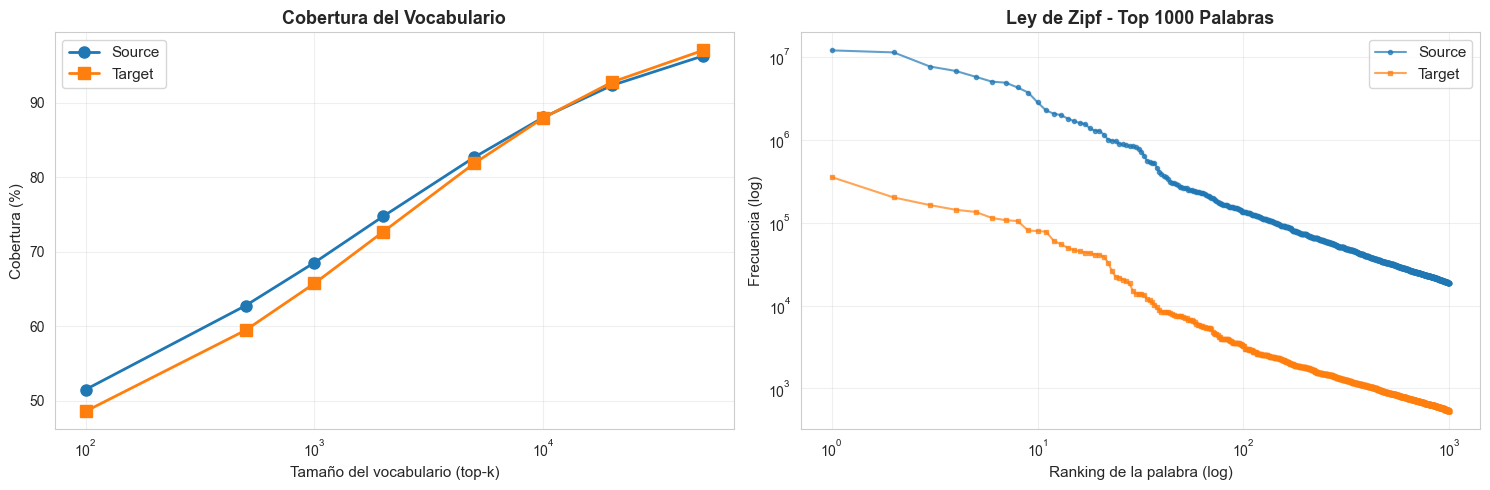

In [32]:
# Visualización de cobertura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

vocab_sizes_plot = [c[0] for c in src_coverage]
src_cov_plot = [c[1] for c in src_coverage]
tgt_cov_plot = [c[1] for c in tgt_coverage]

ax1.plot(vocab_sizes_plot, src_cov_plot, marker='o', linewidth=2, markersize=8, label='Source')
ax1.plot(vocab_sizes_plot, tgt_cov_plot, marker='s', linewidth=2, markersize=8, label='Target')
ax1.set_xlabel('Tamaño del vocabulario (top-k)', fontsize=11)
ax1.set_ylabel('Cobertura (%)', fontsize=11)
ax1.set_title('Cobertura del Vocabulario', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Distribución de frecuencias (log-log para ver ley de Zipf)
src_ranks = list(range(1, min(1000, len(src_words)) + 1))
src_top_freqs = [freq for word, freq in src_words.most_common(1000)]
tgt_ranks = list(range(1, min(1000, len(tgt_words)) + 1))
tgt_top_freqs = [freq for word, freq in tgt_words.most_common(1000)]

ax2.loglog(src_ranks, src_top_freqs, marker='o', markersize=3, label='Source', alpha=0.7)
ax2.loglog(tgt_ranks, tgt_top_freqs, marker='s', markersize=3, label='Target', alpha=0.7)
ax2.set_xlabel('Ranking de la palabra (log)', fontsize=11)
ax2.set_ylabel('Frecuencia (log)', fontsize=11)
ax2.set_title('Ley de Zipf - Top 1000 Palabras', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [33]:
# ============================================
# ANÁLISIS DE CARACTERES ESPECIALES Y NÚMEROS
# ============================================
import re

def analyze_special_chars(data, name):
    total_lines = len(data)
    lines_with_numbers = sum(1 for line in data if re.search(r'\d', line))
    lines_with_punctuation = sum(1 for line in data if re.search(r'[.,;:!?]', line))
    lines_with_quotes = sum(1 for line in data if re.search(r'["\']', line))
    lines_with_parentheses = sum(1 for line in data if re.search(r'[()]', line))
    
    # Caracteres especiales en el texto completo
    all_text = ' '.join(data)
    total_chars = len(all_text)
    digits = len(re.findall(r'\d', all_text))
    punctuation = len(re.findall(r'[.,;:!?]', all_text))
    
    print(f"\n{name}:")
    print(f"  Líneas con números: {lines_with_numbers:,} ({lines_with_numbers/total_lines*100:.1f}%)")
    print(f"  Líneas con puntuación: {lines_with_punctuation:,} ({lines_with_punctuation/total_lines*100:.1f}%)")
    print(f"  Líneas con comillas: {lines_with_quotes:,} ({lines_with_quotes/total_lines*100:.1f}%)")
    print(f"  Líneas con paréntesis: {lines_with_parentheses:,} ({lines_with_parentheses/total_lines*100:.1f}%)")
    print(f"  Total de dígitos: {digits:,} ({digits/total_chars*100:.2f}% del texto)")
    print(f"  Total de puntuación: {punctuation:,} ({punctuation/total_chars*100:.2f}% del texto)")

print("=" * 50)
print("ANÁLISIS DE CARACTERES ESPECIALES")
print("=" * 50)
analyze_special_chars(src_data, "SOURCE")
analyze_special_chars(tgt_data, "TARGET")

ANÁLISIS DE CARACTERES ESPECIALES

SOURCE:
  Líneas con números: 247,184 (92.8%)
  Líneas con puntuación: 266,366 (100.0%)
  Líneas con comillas: 100,315 (37.7%)
  Líneas con paréntesis: 192,765 (72.4%)
  Total de dígitos: 9,389,274 (0.82% del texto)
  Total de puntuación: 21,318,321 (1.87% del texto)

TARGET:
  Líneas con números: 59,644 (22.4%)
  Líneas con puntuación: 132,054 (49.6%)
  Líneas con comillas: 29,985 (11.3%)
  Líneas con paréntesis: 4,429 (1.7%)
  Total de dígitos: 230,525 (0.74% del texto)
  Total de puntuación: 237,944 (0.77% del texto)


ANÁLISIS DE RATIO DE COMPRESIÓN
Ratio medio: 41.45x
Ratio mediano: 36.16x
Desv. estándar: 28.74
Ratio mínimo: 0.71x
Ratio máximo: 1037.00x
Percentil 25: 24.44x
Percentil 75: 51.55x


/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_71924/357325466.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


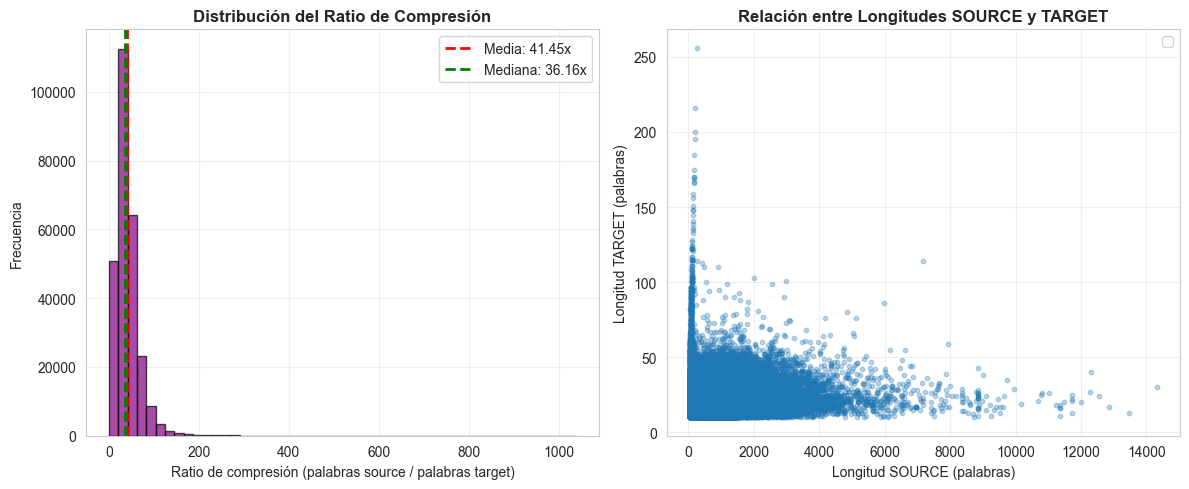

In [38]:

compression_ratios = [len(src.split()) / len(tgt.split()) if len(tgt.split()) > 0 else 0 
                     for src, tgt in zip(src_data, tgt_data)]

print("=" * 50)
print("ANÁLISIS DE RATIO DE COMPRESIÓN")
print("=" * 50)
print(f"Ratio medio: {np.mean(compression_ratios):.2f}x")
print(f"Ratio mediano: {np.median(compression_ratios):.2f}x")
print(f"Desv. estándar: {np.std(compression_ratios):.2f}")
print(f"Ratio mínimo: {min(compression_ratios):.2f}x")
print(f"Ratio máximo: {max(compression_ratios):.2f}x")
print(f"Percentil 25: {np.percentile(compression_ratios, 25):.2f}x")
print(f"Percentil 75: {np.percentile(compression_ratios, 75):.2f}x")

# Visualización
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(compression_ratios, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(np.mean(compression_ratios), color='red', linestyle='--', 
            label=f'Media: {np.mean(compression_ratios):.2f}x', linewidth=2)
plt.axvline(np.median(compression_ratios), color='green', linestyle='--', 
            label=f'Mediana: {np.median(compression_ratios):.2f}x', linewidth=2)
plt.xlabel('Ratio de compresión (palabras source / palabras target)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Distribución del Ratio de Compresión', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(src_lengths, tgt_lengths, alpha=0.3, s=10)
plt.xlabel('Longitud SOURCE (palabras)', fontsize=10)
plt.ylabel('Longitud TARGET (palabras)', fontsize=10)
plt.title('Relación entre Longitudes SOURCE y TARGET', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.legend()

plt.tight_layout()
plt.show()

In [36]:

path_val_src = '../data/val.txt.src'
path_val_tgt = '../data/val.txt.tgt'
path_test_src = '../data/test.txt.src'
path_test_tgt = '../data/test.txt.tgt'

val_src = load_data(path_val_src)
val_tgt = load_data(path_val_tgt)
test_src = load_data(path_test_src)
test_tgt = load_data(path_test_tgt)

print("=" * 50)
print("RESUMEN DE TODOS LOS DATASETS")
print("=" * 50)

datasets = {
    'TRAIN': (src_data, tgt_data),
    'VALIDATION': (val_src, val_tgt),
    'TEST': (test_src, test_tgt)
}

for name, (src, tgt) in datasets.items():
    src_len = [len(text.split()) for text in src]
    tgt_len = [len(text.split()) for text in tgt]
    
    print(f"\n{name}:")
    print(f"  Ejemplos: {len(src):,}")
    print(f"  Source - Media: {np.mean(src_len):.1f}, Mediana: {np.median(src_len):.1f}, Max: {max(src_len)}")
    print(f"  Target - Media: {np.mean(tgt_len):.1f}, Mediana: {np.median(tgt_len):.1f}, Max: {max(tgt_len)}")
    print(f"  Ratio compresión: {np.mean(src_len)/np.mean(tgt_len):.2f}x")

total_examples = len(src_data) + len(val_src) + len(test_src)
print(f"\n{'='*50}")
print(f"TOTAL DE EJEMPLOS: {total_examples:,}")
print(f"Split: Train {len(src_data)/total_examples*100:.1f}% | "
      f"Val {len(val_src)/total_examples*100:.1f}% | "
      f"Test {len(test_src)/total_examples*100:.1f}%")

RESUMEN DE TODOS LOS DATASETS

TRAIN:
  Ejemplos: 266,367
  Source - Media: 793.9, Mediana: 697.0, Max: 14313
  Target - Media: 20.5, Mediana: 20.0, Max: 256
  Ratio compresión: 38.76x

VALIDATION:
  Ejemplos: 10,358
  Source - Media: 848.8, Mediana: 750.0, Max: 17619
  Target - Media: 23.0, Mediana: 22.0, Max: 91
  Ratio compresión: 36.87x

TEST:
  Ejemplos: 13,920
  Source - Media: 890.9, Mediana: 798.0, Max: 16289
  Target - Media: 23.3, Mediana: 22.0, Max: 100
  Ratio compresión: 38.17x

TOTAL DE EJEMPLOS: 290,645
Split: Train 91.6% | Val 3.6% | Test 4.8%
